In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,5


In [2]:
from sklearn.linear_model import LinearRegression # Model
from sklearn.model_selection import train_test_split # train/test data
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_absolute_error # checking results

In [3]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)
    
    def inverse_transform(self, data_list):
        return self.label_encoder.inverse_transform(data_list)

In [4]:
df = pd.read_csv('energy_dataset.csv')
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
#df.dtypes

UTC stands for Universal Time. 
CET is known as Central European Time. CET is 1 hours ahead of UTC. So, when it is 11:00am UTC it will be 12:00pm CET.
Spain has two time zones and observes daylight saving time. Spain mainly uses Central European Time (GMT+01:00) and Central European Summer Time (GMT+02:00) in Peninsular Spain, the Balearic Islands, Ceuta, Melilla and plazas de soberanía. In the Canary Islands, the time zone is Western European Time (GMT±00:00) and Western European Summer Time (GMT+01:00). Daylight saving time is observed from the last Sunday in March (01:00 GMT) to the last Sunday in October (01:00 GMT) throughout Spain.
GMT as a synonym for Coordinated Universal Time (UTC).

In [6]:
from datetime import datetime
df['time']=pd.to_datetime(df['time'],utc=True,format='%Y-%m-%d %H:%M:%S')
#indexedDataset=df.set_index('time')
#indexedDataset.head()
df.head()




,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [7]:
#time series
ts = df['price actual']
ts.head()

0    65.41
1    64.92
2    64.48
3    59.32
4    56.04
Name: price actual, dtype: float64

In [8]:
dateTime=df['time']
dateTime.head()


0   2014-12-31 23:00:00+00:00
1   2015-01-01 00:00:00+00:00
2   2015-01-01 01:00:00+00:00
3   2015-01-01 02:00:00+00:00
4   2015-01-01 03:00:00+00:00
Name: time, dtype: datetime64[ns, UTC]

In [9]:
dateTime[4].hour


3

In [10]:
# Drop unusable columns

df = df.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 
                            'generation hydro pumped storage aggregated', 'generation marine', 
                            'generation wind offshore', 'forecast wind offshore eday ahead'], 
                            axis=1)
df.head()


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [11]:
#making new column with month,day in the week and hour

df.insert(loc=1,column='Month',value=pd.DatetimeIndex(df['time']).month)
df.insert(loc=2,column='DayInTheWeek',value=pd.DatetimeIndex(df['time']).weekday)
df.insert(loc=3,column='Hour',value=pd.DatetimeIndex(df['time']).hour)
#df['Month'] = pd.DatetimeIndex(df['time']).month
df.head()

,time,Month,DayInTheWeek,Hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,12,2,23,447.0,329.0,4844.0,4821.0,162.0,863.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,1,3,0,449.0,328.0,5196.0,4755.0,158.0,920.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,1,3,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,1,3,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,1,3,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [12]:
# dropping column (price actual) 
# dropping also column with time, linear regression works on numerical data
df = df.drop(['time'], axis=1)

y = df['price actual']
X = df.drop("price actual", axis = 1)
#adding missing values
X.fillna(X.mean(), inplace=True)



In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 22 columns):
Month                                          35064 non-null int64
DayInTheWeek                                   35064 non-null int64
Hour                                           35064 non-null int64
generation biomass                             35064 non-null float64
generation fossil brown coal/lignite           35064 non-null float64
generation fossil gas                          35064 non-null float64
generation fossil hard coal                    35064 non-null float64
generation fossil oil                          35064 non-null float64
generation hydro pumped storage consumption    35064 non-null float64
generation hydro run-of-river and poundage     35064 non-null float64
generation hydro water reservoir               35064 non-null float64
generation nuclear                             35064 non-null float64
generation other                               35064 non-

In [14]:
#X.loc[110]

In [15]:
#Creating train and test set 
#for the last 24 hour
X_train=X[1:len(df)-24]
X_test=X[len(df)-24:]
y_train=y[1:len(df)-24]
y_test=y[len(df)-24:]
#print(X_train.tail(25))
#print(X_test.head(24))
print(X_train.shape)
print(X_test.shape)
X_train.head()
y_test

(35039, 22)
(24, 22)


35040    68.40
35041    60.32
35042    57.73
35043    57.66
35044    57.04
35045    57.48
35046    61.13
35047    60.70
35048    66.64
35049    70.33
35050    72.12
35051    71.81
35052    72.42
35053    71.80
35054    71.95
35055    70.85
35056    71.36
35057    75.13
35058    77.61
35059    77.02
35060    76.16
35061    74.30
35062    69.89
35063    69.88
Name: price actual, dtype: float64

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35039 entries, 1 to 35039
Data columns (total 22 columns):
Month                                          35039 non-null int64
DayInTheWeek                                   35039 non-null int64
Hour                                           35039 non-null int64
generation biomass                             35039 non-null float64
generation fossil brown coal/lignite           35039 non-null float64
generation fossil gas                          35039 non-null float64
generation fossil hard coal                    35039 non-null float64
generation fossil oil                          35039 non-null float64
generation hydro pumped storage consumption    35039 non-null float64
generation hydro run-of-river and poundage     35039 non-null float64
generation hydro water reservoir               35039 non-null float64
generation nuclear                             35039 non-null float64
generation other                               35039 non-

In [17]:
model = LinearRegression(n_jobs = -1)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [18]:
prediction = model.predict(X_test)
prediction

array([70.36855202, 63.18823688, 61.75179316, 61.20133097, 60.98272614,
       61.42666967, 64.55927048, 64.23536384, 68.45479492, 73.1572442 ,
       74.82112475, 74.78679171, 75.09762515, 75.16025278, 75.44497873,
       74.87764275, 74.94210484, 76.61382293, 77.27920282, 78.04466719,
       77.67150059, 76.23146289, 73.66881007, 73.40370484])

In [19]:
prediction = model.predict(X_test)
mean_absolute_error(y_test, prediction)

2.8458861947522345

In [20]:
data={'actual':y_test,'predicted':prediction}
compare_df = pd.DataFrame(data)

compare_df

,actual,predicted
35040,68.40,70.368552
35041,60.32,63.188237
35042,57.73,61.751793
35043,57.66,61.201331
35044,57.04,60.982726
35045,57.48,61.426670
35046,61.13,64.559270
35047,60.70,64.235364
35048,66.64,68.454795
35049,70.33,73.157244


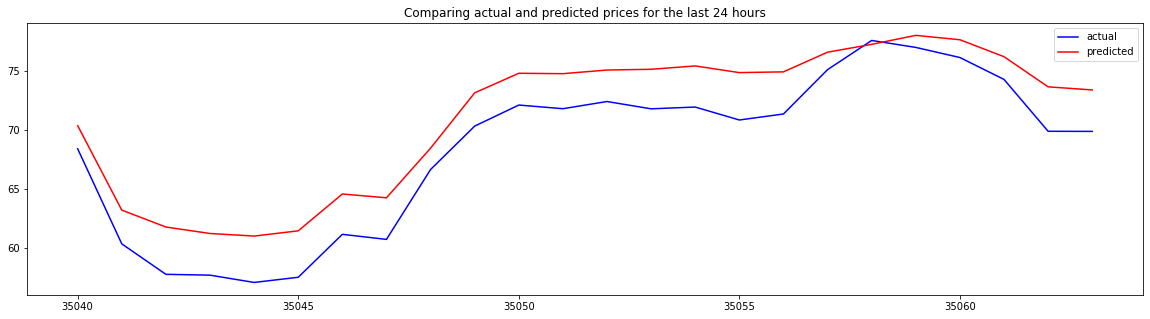

In [21]:
#plotting predicted values vs. actual values
rcParams['figure.figsize']=20,5
actual=plt.plot(compare_df['actual'],color='blue',label='actual')
predicted=plt.plot(compare_df['predicted'],color='red',label='predicted')

plt.legend(loc='best')
plt.title('Comparing actual and predicted prices for the last 24 hours')
plt.show(block=False)

In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(compare_df.actual, compare_df.predicted)
r2

0.7902094186804984

The r^2 (or r Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination.

This is a value between 0 and 1 for no-fit and perfect fit respectively.

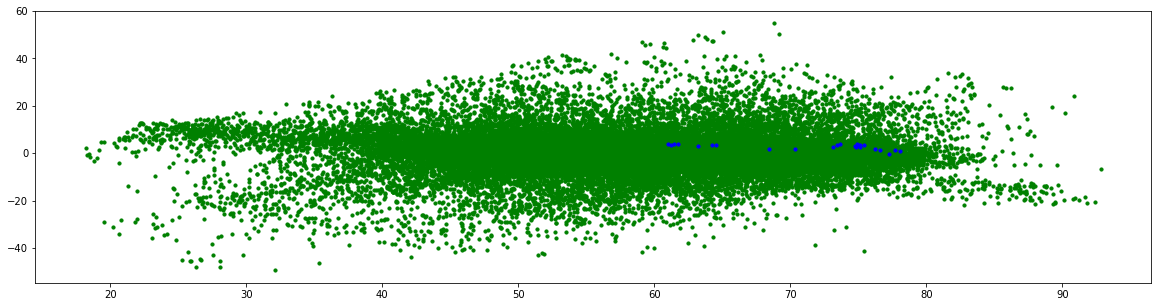

In [23]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 

In [24]:
X['Month'][len(X)-365*24:]


26304    12
26305     1
26306     1
26307     1
26308     1
26309     1
26310     1
26311     1
26312     1
26313     1
26314     1
26315     1
26316     1
26317     1
26318     1
26319     1
26320     1
26321     1
26322     1
26323     1
26324     1
26325     1
26326     1
26327     1
26328     1
26329     1
26330     1
26331     1
26332     1
26333     1
         ..
35034    12
35035    12
35036    12
35037    12
35038    12
35039    12
35040    12
35041    12
35042    12
35043    12
35044    12
35045    12
35046    12
35047    12
35048    12
35049    12
35050    12
35051    12
35052    12
35053    12
35054    12
35055    12
35056    12
35057    12
35058    12
35059    12
35060    12
35061    12
35062    12
35063    12
Name: Month, Length: 8760, dtype: int64

In [25]:
#this frame represents the same day in the year(1st January), 2 years in the past
#so for prediction we will use that part of data frame
new_df=X[len(X)-365*24*2:len(X)-365*24*2+24].copy()
new_df

,Month,DayInTheWeek,Hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,...,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead
17544,12,5,23,341.0,901.0,5412.0,6157.0,175.0,392.0,542.0,...,56.0,95.0,30.0,265.0,1760.0,5.0,1732.0,24255.0,24401.0,58.82
17545,1,6,0,338.0,900.0,5401.0,5959.0,176.0,422.0,504.0,...,57.0,96.0,30.0,265.0,1825.0,1.0,1826.0,23326.0,23393.0,58.23
17546,1,6,1,337.0,908.0,4753.0,5723.0,175.0,857.0,478.0,...,58.0,96.0,50.0,265.0,1814.0,5.0,1823.0,22287.0,21909.0,51.95
17547,1,6,2,335.0,915.0,4321.0,5523.0,175.0,1146.0,465.0,...,57.0,97.0,87.0,263.0,1792.0,10.0,1777.0,21038.0,20615.0,47.27
17548,1,6,3,336.0,904.0,4320.0,5295.0,175.0,1665.0,462.0,...,57.0,97.0,92.0,263.0,1712.0,24.0,1746.0,20079.0,19628.0,45.49
17549,1,6,4,336.0,929.0,3920.0,5252.0,176.0,2000.0,462.0,...,57.0,96.0,92.0,262.0,1662.0,30.0,1662.0,19841.0,19252.0,44.50
17550,1,6,5,337.0,915.0,4009.0,5089.0,176.0,2019.0,457.0,...,57.0,94.0,92.0,259.0,1695.0,40.0,1684.0,19792.0,19351.0,44.50
17551,1,6,6,336.0,914.0,4196.0,4966.0,178.0,2034.0,457.0,...,57.0,94.0,88.0,267.0,1789.0,46.0,1780.0,20109.0,19691.0,44.72
17552,1,6,7,337.0,912.0,3969.0,4832.0,178.0,2152.0,469.0,...,56.0,93.0,59.0,267.0,1769.0,100.0,1803.0,20369.0,19600.0,44.22
17553,1,6,8,340.0,915.0,3930.0,4699.0,176.0,1716.0,487.0,...,56.0,93.0,386.0,270.0,1684.0,563.0,1737.0,21056.0,20238.0,45.13


In [26]:

index=[i for i in range(len(X),(len(X)+24))]
print(index)


[35064, 35065, 35066, 35067, 35068, 35069, 35070, 35071, 35072, 35073, 35074, 35075, 35076, 35077, 35078, 35079, 35080, 35081, 35082, 35083, 35084, 35085, 35086, 35087]


In [27]:
# adding new data frame with new 24h, for prediction
frames = [X, new_df]

result = pd.concat(frames)
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35088 entries, 0 to 17567
Data columns (total 22 columns):
Month                                          35088 non-null int64
DayInTheWeek                                   35088 non-null int64
Hour                                           35088 non-null int64
generation biomass                             35088 non-null float64
generation fossil brown coal/lignite           35088 non-null float64
generation fossil gas                          35088 non-null float64
generation fossil hard coal                    35088 non-null float64
generation fossil oil                          35088 non-null float64
generation hydro pumped storage consumption    35088 non-null float64
generation hydro run-of-river and poundage     35088 non-null float64
generation hydro water reservoir               35088 non-null float64
generation nuclear                             35088 non-null float64
generation other                               35088 non-

In [28]:
#adding missing values
#result.fillna(result.mean(), inplace=True)
#result.head()


In [29]:
result.tail(30)

,Month,DayInTheWeek,Hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,...,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead
35058,12,0,17,293.0,0.0,7593.0,2604.0,178.0,1.0,1131.0,...,61.0,92.0,266.0,289.0,2952.0,300.0,3028.0,29690.0,29592.0,68.58
35059,12,0,18,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,...,63.0,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85
35060,12,0,19,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,...,62.0,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40
35061,12,0,20,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,...,61.0,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88
35062,12,0,21,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,...,61.0,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93
35063,12,0,22,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,...,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27
17544,12,5,23,341.0,901.0,5412.0,6157.0,175.0,392.0,542.0,...,56.0,95.0,30.0,265.0,1760.0,5.0,1732.0,24255.0,24401.0,58.82
17545,1,6,0,338.0,900.0,5401.0,5959.0,176.0,422.0,504.0,...,57.0,96.0,30.0,265.0,1825.0,1.0,1826.0,23326.0,23393.0,58.23
17546,1,6,1,337.0,908.0,4753.0,5723.0,175.0,857.0,478.0,...,58.0,96.0,50.0,265.0,1814.0,5.0,1823.0,22287.0,21909.0,51.95
17547,1,6,2,335.0,915.0,4321.0,5523.0,175.0,1146.0,465.0,...,57.0,97.0,87.0,263.0,1792.0,10.0,1777.0,21038.0,20615.0,47.27


In [30]:
#replacing information for new 24 h

result['DayInTheWeek'][len(result)-25:len(result)]=1

result.tail(30)

C:\Users\pc\Anaconda3\Lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,DayInTheWeek,Hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,...,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead
35058,12,0,17,293.0,0.0,7593.0,2604.0,178.0,1.0,1131.0,...,61.0,92.0,266.0,289.0,2952.0,300.0,3028.0,29690.0,29592.0,68.58
35059,12,0,18,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,...,63.0,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85
35060,12,0,19,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,...,62.0,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40
35061,12,0,20,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,...,61.0,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88
35062,12,0,21,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,...,61.0,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93
35063,12,1,22,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,...,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27
17544,12,1,23,341.0,901.0,5412.0,6157.0,175.0,392.0,542.0,...,56.0,95.0,30.0,265.0,1760.0,5.0,1732.0,24255.0,24401.0,58.82
17545,1,1,0,338.0,900.0,5401.0,5959.0,176.0,422.0,504.0,...,57.0,96.0,30.0,265.0,1825.0,1.0,1826.0,23326.0,23393.0,58.23
17546,1,1,1,337.0,908.0,4753.0,5723.0,175.0,857.0,478.0,...,58.0,96.0,50.0,265.0,1814.0,5.0,1823.0,22287.0,21909.0,51.95
17547,1,1,2,335.0,915.0,4321.0,5523.0,175.0,1146.0,465.0,...,57.0,97.0,87.0,263.0,1792.0,10.0,1777.0,21038.0,20615.0,47.27


In [31]:
#new set 
X_new_test=result[len(result)-24:]
X_new_test


,Month,DayInTheWeek,Hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,...,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead
17544,12,1,23,341.0,901.0,5412.0,6157.0,175.0,392.0,542.0,...,56.0,95.0,30.0,265.0,1760.0,5.0,1732.0,24255.0,24401.0,58.82
17545,1,1,0,338.0,900.0,5401.0,5959.0,176.0,422.0,504.0,...,57.0,96.0,30.0,265.0,1825.0,1.0,1826.0,23326.0,23393.0,58.23
17546,1,1,1,337.0,908.0,4753.0,5723.0,175.0,857.0,478.0,...,58.0,96.0,50.0,265.0,1814.0,5.0,1823.0,22287.0,21909.0,51.95
17547,1,1,2,335.0,915.0,4321.0,5523.0,175.0,1146.0,465.0,...,57.0,97.0,87.0,263.0,1792.0,10.0,1777.0,21038.0,20615.0,47.27
17548,1,1,3,336.0,904.0,4320.0,5295.0,175.0,1665.0,462.0,...,57.0,97.0,92.0,263.0,1712.0,24.0,1746.0,20079.0,19628.0,45.49
17549,1,1,4,336.0,929.0,3920.0,5252.0,176.0,2000.0,462.0,...,57.0,96.0,92.0,262.0,1662.0,30.0,1662.0,19841.0,19252.0,44.50
17550,1,1,5,337.0,915.0,4009.0,5089.0,176.0,2019.0,457.0,...,57.0,94.0,92.0,259.0,1695.0,40.0,1684.0,19792.0,19351.0,44.50
17551,1,1,6,336.0,914.0,4196.0,4966.0,178.0,2034.0,457.0,...,57.0,94.0,88.0,267.0,1789.0,46.0,1780.0,20109.0,19691.0,44.72
17552,1,1,7,337.0,912.0,3969.0,4832.0,178.0,2152.0,469.0,...,56.0,93.0,59.0,267.0,1769.0,100.0,1803.0,20369.0,19600.0,44.22
17553,1,1,8,340.0,915.0,3930.0,4699.0,176.0,1716.0,487.0,...,56.0,93.0,386.0,270.0,1684.0,563.0,1737.0,21056.0,20238.0,45.13


In [32]:
model2= LinearRegression(n_jobs = -1)
model2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [33]:
prediction_future = model.predict(X_new_test)
prediction_future

array([66.31913992, 53.35585144, 48.97011392, 45.68927813, 45.26619534,
       45.09723728, 45.46589566, 45.83125567, 45.92357368, 46.55716479,
       47.27591754, 48.78718642, 50.56441092, 50.29540268, 49.37672514,
       48.78005276, 48.67461486, 51.88970175, 58.04130107, 59.77040398,
       61.59164111, 59.05981558, 57.74415727, 52.31311211])

In [34]:
len(prediction_future)

24

In [35]:
prediction_future_frame = pd.DataFrame(prediction_future,index=[i for i in range(len(df),len(df)+24)])
prediction_future_frame

,0
35064,66.319140
35065,53.355851
35066,48.970114
35067,45.689278
35068,45.266195
35069,45.097237
35070,45.465896
35071,45.831256
35072,45.923574
35073,46.557165


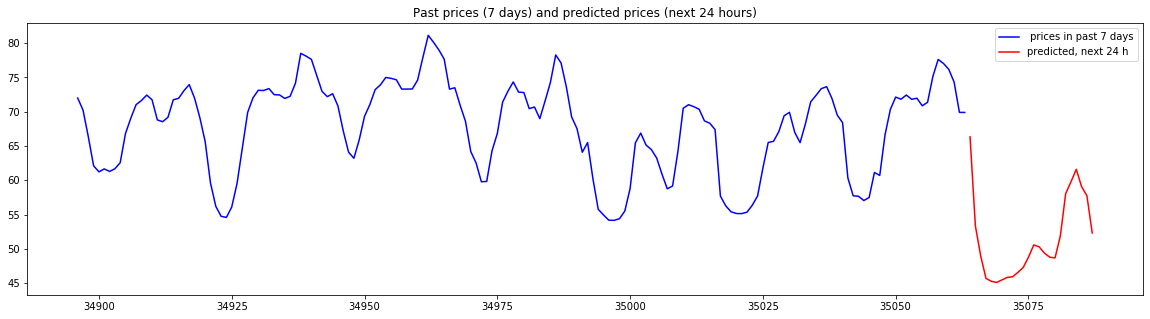

In [36]:
#plotting predicted values 
rcParams['figure.figsize']=20,5
old_df=plt.plot(df['price actual'].tail(168),color='blue',label=' prices in past 7 days')
future_df=plt.plot(prediction_future_frame,color='red',label='predicted, next 24 h')

plt.legend(loc='best')
plt.title('Past prices (7 days) and predicted prices (next 24 hours)')
plt.show(block=False)